In [1]:
import librosa
import librosa.display
import os
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
# Definir las rutas a las carpetas
base_dir = r'C:\Users\ferna\CursoMachine\Gritos\dataset'
path_gritos = os.path.join(base_dir, 'Screaming')
path_nogritos = os.path.join(base_dir, 'NotScreaming')

In [3]:
def print_audio_info(path, category):
    files = [os.path.join(path, file) for file in os.listdir(path)]
    file_path = files[0]  # Tomar el primer archivo como ejemplo
    data, sample_rate = librosa.load(file_path, sr=None)
    print(f"Categoría: {category}")
    print(f"Archivo: {file_path}")
    print(f"Tasa de muestreo: {sample_rate} Hz")
    print(f"Duración: {len(data)/sample_rate:.2f} segundos")
    print("\n")
    return file_path

In [4]:
# Mostrar información de audio
file_path_gritos = print_audio_info(path_gritos, "Gritos")
file_path_nogritos = print_audio_info(path_nogritos, "No Gritos")

Categoría: Gritos
Archivo: C:\Users\ferna\CursoMachine\Gritos\dataset\Screaming\---1_cCGK4M_out.wav
Tasa de muestreo: 44100 Hz
Duración: 10.00 segundos


Categoría: No Gritos
Archivo: C:\Users\ferna\CursoMachine\Gritos\dataset\NotScreaming\-oxF9jhY94s_out.wav
Tasa de muestreo: 44100 Hz
Duración: 9.90 segundos




In [5]:
def play_audio(file_path, category):
    print(f"Reproduciendo audio de la categoría: {category}")
    ipd.display(ipd.Audio(file_path))

In [6]:
# Reproducir audios
play_audio(file_path_gritos, "Gritos")
play_audio(file_path_nogritos, "No Gritos")

Reproduciendo audio de la categoría: Gritos


Reproduciendo audio de la categoría: No Gritos


In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(file_path, category):
    # Cargar el archivo de audio
    data, sample_rate = librosa.load(file_path, sr=None)  # Asegurar que se use la tasa de muestreo original del archivo
    
    # Calcular la duración del audio y crear una matriz de tiempos
    duration = librosa.get_duration(y=data, sr=sample_rate)
    times = librosa.times_like(data, sr=sample_rate)  # Generar la matriz de tiempos
    
    # Crear la figura y el plot
    plt.figure(figsize=(12, 4))
    plt.plot(times, data)  # Plotear la forma de onda con los tiempos
    plt.title(f"Forma de onda de {category}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.show()

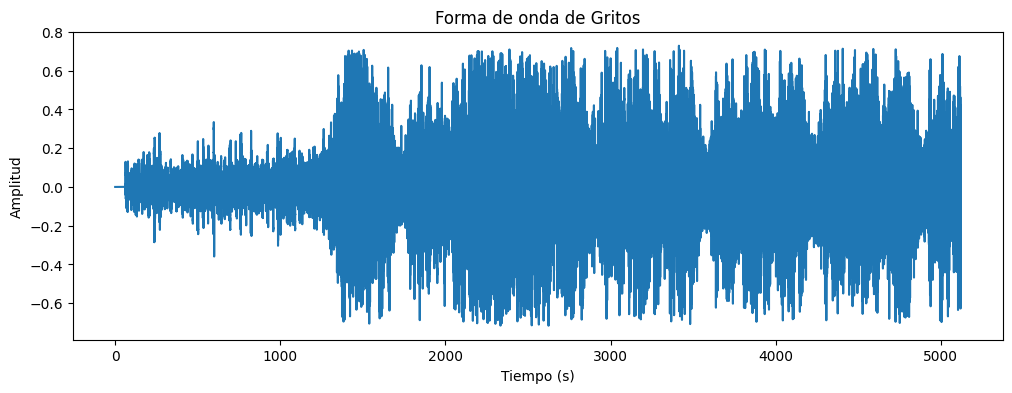

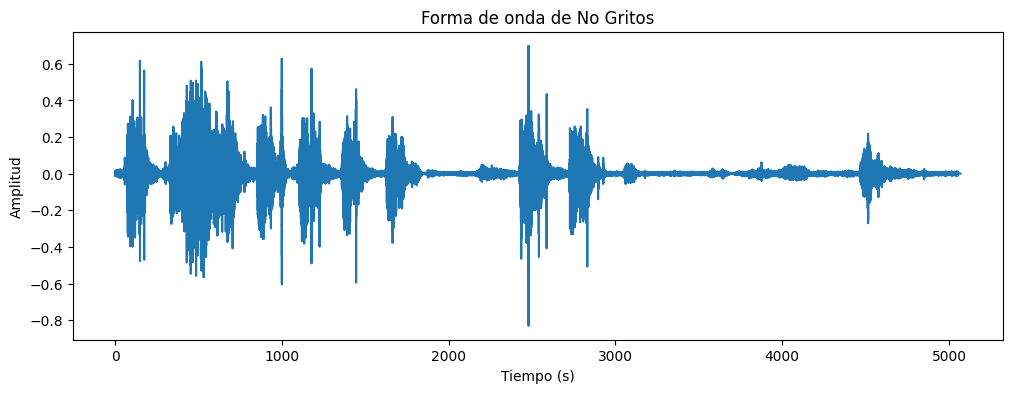

In [8]:
# Graficar formas de onda
plot_waveform(file_path_gritos, "Gritos")
plot_waveform(file_path_nogritos, "No Gritos")

# ¿Qué es un Espectrograma?
Un espectrograma es una imagen que muestra cómo las frecuencias presentes en un sonido varían con el tiempo. El eje horizontal representa el tiempo, el eje vertical representa la frecuencia, y la intensidad de los colores representa la amplitud (o la energía) de las diferentes frecuencias en ese momento. En el contexto de los gritos, podrías ver diferencias en la distribución de energía a lo largo de las frecuencias.

In [9]:
def plot_spectrogram(file_path, category):
    # Cargar el archivo de audio
    data, sample_rate = librosa.load(file_path, sr=None)

    # Generar el espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

    # Crear la figura para el espectrograma
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Espectrograma de {category}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Frecuencia (Hz)")
    plt.show()

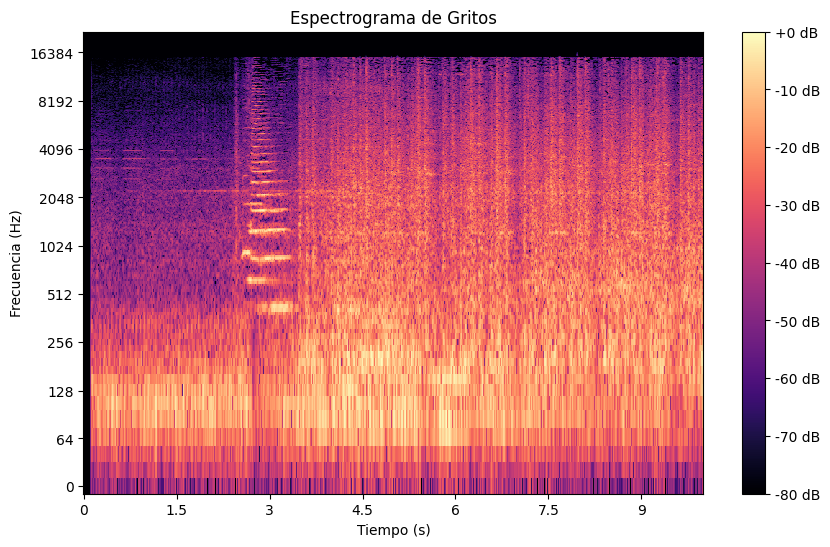

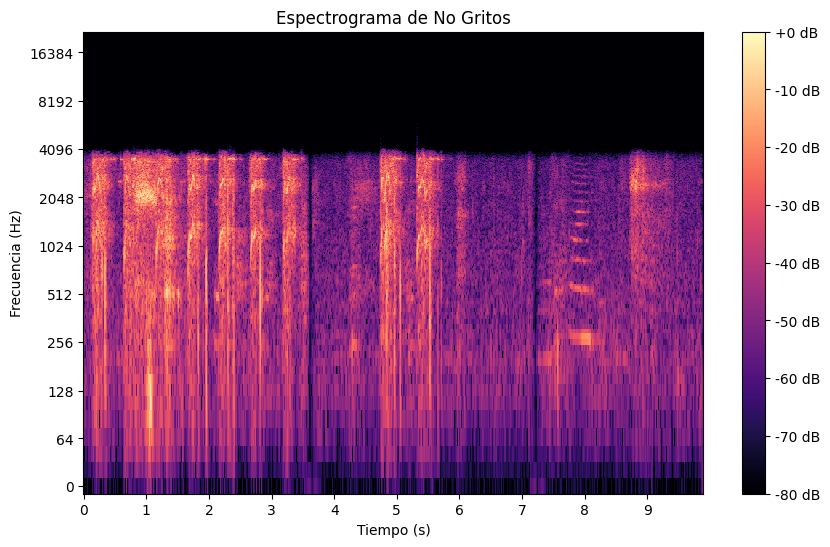

In [10]:
# Graficar espectrogramas
plot_spectrogram(file_path_gritos, "Gritos")
plot_spectrogram(file_path_nogritos, "No Gritos")

# Análisis de los Espectrogramas
## Espectrograma de Gritos

- Frecuencia: Se observa una amplia distribución de energía a lo largo de un rango más extenso de frecuencias. Las frecuencias altas están muy activas, lo que es típico en sonidos agudos y abruptos como los gritos.
- Intensidad de Color: Los colores más brillantes indican mayores niveles de energía. En este espectrograma, hay una variabilidad significativa en la intensidad, con algunos picos de energía muy altos. Esto podría representar momentos de mayor intensidad en el grito.
- Patrones Temporales: Hay cambios abruptos y dramáticos en la energía a lo largo del tiempo, lo que puede indicar la naturaleza explosiva y variable de un grito.

## Espectrograma de No Gritos

- Frecuencia: La energía se concentra en frecuencias más bajas en comparación con el espectrograma de gritos. Aunque hay actividad en las frecuencias altas, es menos intensa y más uniforme.
- Intensidad de Color: Los colores son en general más oscuros, indicando menores niveles de energía a través del espectro. La uniformidad en los colores sugiere menos variabilidad en la intensidad del sonido.
- Patrones Temporales: Los cambios en la energía son menos dramáticos y más uniformes a lo largo del tiempo, lo cual es típico en sonidos más regulares y menos volátiles.

# Cálculo de la Media y Varianza de la Intensidad de las Frecuencias

In [11]:
def calculate_mean_variance(file_path):
    # Cargar el archivo de audio
    data, sample_rate = librosa.load(file_path, sr=None)
    # Generar el espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    # Calcular la media y la varianza
    mean_intensity = np.mean(D)
    variance_intensity = np.var(D)
    return mean_intensity, variance_intensity

In [12]:
# Ejemplo de uso
mean_gritos, var_gritos = calculate_mean_variance(file_path_gritos)
mean_nogritos, var_nogritos = calculate_mean_variance(file_path_nogritos)
print(f"Media de Intensidad de Gritos: {mean_gritos}, Varianza: {var_gritos}")
print(f"Media de Intensidad de No Gritos: {mean_nogritos}, Varianza: {var_nogritos}")

Media de Intensidad de Gritos: -58.61372375488281, Varianza: 386.4887390136719
Media de Intensidad de No Gritos: -73.98798370361328, Varianza: 199.33425903320312


In [13]:
def energy_by_band(file_path):
    data, sample_rate = librosa.load(file_path, sr=None)
    # Generar el espectrograma
    D = np.abs(librosa.stft(data))
    freqs = librosa.fft_frequencies(sr=sample_rate)
    # Definir las bandas de frecuencia
    low = (freqs <= 200)
    mid = (freqs > 200) & (freqs <= 2000)
    high = (freqs > 2000)
    # Calcular la energía por banda
    low_energy = np.sum(D[low])
    mid_energy = np.sum(D[mid])
    high_energy = np.sum(D[high])
    return low_energy, mid_energy, high_energy

In [14]:
# Ejemplo de uso
low_gritos, mid_gritos, high_gritos = energy_by_band(file_path_gritos)
low_nogritos, mid_nogritos, high_nogritos = energy_by_band(file_path_nogritos)
print(f"Energía de Gritos - Bajas: {low_gritos}, Medias: {mid_gritos}, Altas: {high_gritos}")
print(f"Energía de No Gritos - Bajas: {low_nogritos}, Medias: {mid_nogritos}, Altas: {high_nogritos}")

Energía de Gritos - Bajas: 165866.421875, Medias: 534285.625, Altas: 621543.75
Energía de No Gritos - Bajas: 5470.26953125, Medias: 97253.4140625, Altas: 115004.625


In [15]:
def temporal_energy_changes(file_path):
    data, sample_rate = librosa.load(file_path, sr=None)
    # Generar el espectrograma
    D = np.abs(librosa.stft(data))
    # Calcular la energía temporal (suma a lo largo de las frecuencias)
    temporal_energy = np.sum(D, axis=0)
    # Calcular estadísticas
    mean_change = np.mean(np.diff(temporal_energy))
    std_change = np.std(np.diff(temporal_energy))
    return mean_change, std_change

In [16]:
# Ejemplo de uso
mean_change_gritos, std_change_gritos = temporal_energy_changes(file_path_gritos)
mean_change_nogritos, std_change_nogritos = temporal_energy_changes(file_path_nogritos)
print(f"Cambios Temporales en Gritos - Media: {mean_change_gritos}, Desviación Estándar: {std_change_gritos}")
print(f"Cambios Temporales en No Gritos - Media: {mean_change_nogritos}, Desviación Estándar: {std_change_nogritos}")

Cambios Temporales en Gritos - Media: 2.5189270973205566, Desviación Estándar: 259.41796875
Cambios Temporales en No Gritos - Media: -0.04499863460659981, Desviación Estándar: 97.09320831298828


1. Media y Varianza de la Intensidad:
Los gritos presentan una media de intensidad de -58.61 dB y una varianza de 386.49, lo que indica que son generalmente más intensos y presentan una mayor variabilidad en su intensidad en comparación con los sonidos que no son gritos, que tienen una media de intensidad de -73.99 dB y una varianza de 199.33. Esto sugiere que los gritos pueden variar dramáticamente en volumen, característica típica de sonidos abruptos y potentes.

2. Distribución de Energía en Bandas Específicas de Frecuencia:
En los gritos, la energía se distribuye significativamente más alta a través de todas las bandas de frecuencia, con valores de 165866.42, 534285.63, y 621543.75 para las bandas bajas, medias y altas, respectivamente. En contraste, los no gritos muestran mucha menos energía, particularmente en las bandas bajas (5470.27) y una distribución más moderada en las bandas medias (97253.41) y altas (115004.63). Esto resalta la presencia más intensa y variada de frecuencias en los gritos, asociada a sonidos más agudos y posiblemente alarmantes.

3. Cambios Temporales en la Energía:
Los gritos muestran un promedio de cambio temporal en energía de 2.52 con una desviación estándar de 259.42, indicando cambios rápidos y sustanciales en su energía, típicos de sonidos que empiezan y terminan bruscamente. Los no gritos, en cambio, exhiben cambios mínimos y más estables en el tiempo, con una media casi nula (-0.04) y una desviación estándar más baja (97.09), sugiriendo un comportamiento más constante y menos volátil.

# Convertir Audio en Espectrogramas

In [17]:
def fix_spectrogram_length(spectrogram, max_columns=432):
    # Si el espectrograma es más largo que 'max_columns', lo recortamos
    if spectrogram.shape[1] > max_columns:
        return spectrogram[:, :max_columns]
    # Si es más corto, lo rellenamos con el valor mínimo de dB en el espectrograma
    elif spectrogram.shape[1] < max_columns:
        padding = max_columns - spectrogram.shape[1]
        min_db = np.min(spectrogram)
        return np.pad(spectrogram, ((0, 0), (0, padding)), 'constant', constant_values=min_db)
    return spectrogram

def audio_to_spectrogram(file_path, max_columns=432):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    fixed_log_S = fix_spectrogram_length(log_S, max_columns)
    return fixed_log_S

def load_data_and_labels(screaming_dir, not_screaming_dir, max_columns=432):
    X, y = [], []
    # Cargar "Screaming"
    for file in os.listdir(screaming_dir):
        file_path = os.path.join(screaming_dir, file)
        if file_path.endswith('.wav'):
            spectrogram = audio_to_spectrogram(file_path, max_columns)
            X.append(spectrogram)
            y.append(1)  # 1 para "Screaming"
        
    # Cargar "NotScreaming"
    for file in os.listdir(not_screaming_dir):
        file_path = os.path.join(not_screaming_dir, file)
        if file_path.endswith('.wav'):
            spectrogram = audio_to_spectrogram(file_path, max_columns)
            X.append(spectrogram)
            y.append(0)  # 0 para "NotScreaming"
        
    return np.array(X), np.array(y)

In [19]:
# Usar las rutas definidas anteriormente y cargar los datos
X, y = load_data_and_labels(path_gritos, path_nogritos)

In [20]:
print(X,y)

[[[-80.         -80.         -80.         ... -23.951342   -23.459705
   -22.931973  ]
  [-80.         -80.         -80.         ... -16.994644   -10.449856
    -7.157524  ]
  [-80.         -80.         -80.         ... -15.891544    -8.383825
    -3.5260334 ]
  ...
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]]

 [[-38.418358   -39.55033    -38.14755    ... -47.407158   -47.35081
   -49.921032  ]
  [-35.30499    -31.041817   -29.364386   ... -43.946373   -43.986496
   -45.773792  ]
  [-33.887924   -22.594624   -20.068283   ... -53.188164   -53.151417
   -51.59066   ]
  ...
  [-64.12891    -70.16303    -80.         ... -80.         -80.
   -80.        ]
  [-64.18408    -70.21849    -80.         ... -80.         -80.
   -80.        ]
  [-64.21525    -70.24948    -80.         ... -80.         -

# Ajuste y Normalización

In [21]:
def adjust_dimensions(spectrograms):
    # Asegurar que los espectrogramas tienen tres canales
    adjusted = np.stack([spectrograms, spectrograms, spectrograms], axis=-1)
    return adjusted

def normalize_spectrograms(spectrograms):
    # Normalizar los espectrogramas
    min_val = np.min(spectrograms)
    max_val = np.max(spectrograms)
    normalized = (spectrograms - min_val) / (max_val - min_val)
    return normalized

In [22]:
# Ajustar las dimensiones para coincidir con la entrada de ResNet
X_adjusted = adjust_dimensions(X)
# Normalizar los espectrogramas
X_normalized = normalize_spectrograms(X_adjusted)

In [23]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Imprimir la cantidad de ejemplos en cada conjunto
print("Número de ejemplos en el conjunto de entrenamiento:", len(X_train))
print("Número de ejemplos en el conjunto de prueba:", len(X_test))

Número de ejemplos en el conjunto de entrenamiento: 320
Número de ejemplos en el conjunto de prueba: 80


In [24]:
print("Dimensiones del espectrograma original:", X_train[0].shape)

Dimensiones del espectrograma original: (128, 432, 3)


In [25]:
import cv2
import numpy as np

def resize_spectrograms(data, new_size=(224, 224)):
    resized_data = []
    for item in data:
        # Redimensionar a 224x224
        resized = cv2.resize(item, new_size, interpolation=cv2.INTER_CUBIC)
        resized_data.append(resized)
    return np.array(resized_data)

# Aplicar a los datos de entrenamiento y prueba
X_train_resized = resize_spectrograms(X_train)
X_test_resized = resize_spectrograms(X_test)

print("Nueva dimensión de los datos de entrenamiento:", X_train_resized[0].shape)
print("Nueva dimensión de los datos de prueba:", X_test_resized[0].shape)

Nueva dimensión de los datos de entrenamiento: (224, 224, 3)
Nueva dimensión de los datos de prueba: (224, 224, 3)


# Configuración y Entrenamiento del Modelo ResNet

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Cargar el modelo base de ResNet50 sin la parte superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir nuevas capas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Usar sigmoid para clasificación binaria

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_resized, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
evaluation = model.evaluate(X_test_resized, y_test)
print('Test Loss:', evaluation[0])
print('Test Accuracy:', evaluation[1])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Cargar el modelo base de ResNet50 sin la parte superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir nuevas capas con regularización y Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Callbacks para reducir la tasa de aprendizaje y detener el entrenamiento temprano
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento con aumentación de datos y callbacks
history = model.fit(datagen.flow(X_train_resized, y_train, batch_size=32),
                    epochs=50, 
                    validation_data=(X_test_resized, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Evaluar el modelo
evaluation = model.evaluate(X_test_resized, y_test)
print('Test Loss:', evaluation[0])
print('Test Accuracy:', evaluation[1])

# PROBANDO OTRO

In [26]:
import numpy as np
import os
import cv2
import librosa
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

In [27]:
# Definir las rutas a las carpetas
base_dir = r'C:\Users\ferna\CursoMachine\Gritos\dataset'
path_gritos = os.path.join(base_dir, 'Screaming')
path_nogritos = os.path.join(base_dir, 'NotScreaming')

In [28]:
def fix_spectrogram_length(spectrogram, max_columns=432):
    if spectrogram.shape[1] > max_columns:
        return spectrogram[:, :max_columns]
    elif spectrogram.shape[1] < max_columns:
        padding = max_columns - spectrogram.shape[1]
        min_db = np.min(spectrogram)
        return np.pad(spectrogram, ((0, 0), (0, padding)), 'constant', constant_values=min_db)
    return spectrogram

def audio_to_spectrogram(file_path, max_columns=432):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    fixed_log_S = fix_spectrogram_length(log_S, max_columns)
    return fixed_log_S

def load_data_and_labels(screaming_dir, not_screaming_dir, max_columns=432):
    X, y = [], []
    for file in os.listdir(screaming_dir):
        file_path = os.path.join(screaming_dir, file)
        if file_path.endswith('.wav'):
            spectrogram = audio_to_spectrogram(file_path, max_columns)
            X.append(spectrogram)
            y.append(1)
        
    for file in os.listdir(not_screaming_dir):
        file_path = os.path.join(not_screaming_dir, file)
        if file_path.endswith('.wav'):
            spectrogram = audio_to_spectrogram(file_path, max_columns)
            X.append(spectrogram)
            y.append(0)
        
    return np.array(X), np.array(y)

X, y = load_data_and_labels(path_gritos, path_nogritos)

def adjust_dimensions(spectrograms):
    adjusted = np.stack([spectrograms, spectrograms, spectrograms], axis=-1)
    return adjusted

def normalize_spectrograms(spectrograms):
    min_val = np.min(spectrograms)
    max_val = np.max(spectrograms)
    normalized = (spectrograms - min_val) / (max_val - min_val)
    return normalized

In [29]:
X_adjusted = adjust_dimensions(X)
X_normalized = normalize_spectrograms(X_adjusted)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Número de ejemplos en el conjunto de entrenamiento:", len(X_train))
print("Número de ejemplos en el conjunto de prueba:", len(X_test))
print("Dimensiones del espectrograma original:", X_train[0].shape)

Número de ejemplos en el conjunto de entrenamiento: 320
Número de ejemplos en el conjunto de prueba: 80
Dimensiones del espectrograma original: (128, 432, 3)


In [31]:
def resize_spectrograms(data, new_size=(224, 224)):
    resized_data = []
    for item in data:
        resized = cv2.resize(item, new_size, interpolation=cv2.INTER_CUBIC)
        resized_data.append(resized)
    return np.array(resized_data)

In [32]:
X_train_resized = resize_spectrograms(X_train)
X_test_resized = resize_spectrograms(X_test)

print("Nueva dimensión de los datos de entrenamiento:", X_train_resized[0].shape)
print("Nueva dimensión de los datos de prueba:", X_test_resized[0].shape)

Nueva dimensión de los datos de entrenamiento: (224, 224, 3)
Nueva dimensión de los datos de prueba: (224, 224, 3)


In [33]:
# Definir el modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir nuevas capas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Callbacks para reducir la tasa de aprendizaje y detener el entrenamiento temprano
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con los datos aumentados
history = model.fit(datagen.flow(X_train_resized, y_train, batch_size=32),
                    epochs=50, 
                    validation_data=(X_test_resized, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Evaluar el modelo
evaluation = model.evaluate(X_test_resized, y_test)
print('Test Loss:', evaluation[0])
print('Test Accuracy:', evaluation[1])



Epoch 1/50


10/10 [==============================] - 141s 14s/step - loss: 1.4276 - accuracy: 0.5531 - val_loss: 0.6994 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 142s 14s/step - loss: 0.7137 - accuracy: 0.5000 - val_loss: 0.7040 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 140s 14s/step - loss: 0.7063 - accuracy: 0.5250 - val_loss: 0.6907 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 145s 14s/step - loss: 0.6979 - accuracy: 0.4938 - val_loss: 0.6934 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 146s 15s/step - loss: 0.6901 - accuracy: 0.5281 - val_loss: 0.6959 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 138s 14s/step - loss: 0.6956 - accuracy: 0.5063 - val_loss: 0.6927 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 141s 14s/step 

# CARGAR MODELO ENTRENADO

In [2]:
import os
import torch

# Paths to the models (asegúrate de que estas rutas sean correctas)
model_path_1 = r'C:\Users\ferna\CursoMachine\Gritos\Models\Resnet34_Model_2023-10-13--16-42-18.pt'
model_path_2 = r'C:\Users\ferna\CursoMachine\Gritos\Models\Resnet34_Model_2023-10-13--17-11-18.pt'

# Check if the paths exist
print(f"Model path 1 exists: {os.path.exists(model_path_1)}")
print(f"Model path 2 exists: {os.path.exists(model_path_2)}")

# Load the models if paths exist
if os.path.exists(model_path_1) and os.path.exists(model_path_2):
    try:
        model_1 = torch.load(model_path_1, map_location=torch.device('cpu'))
        model_2 = torch.load(model_path_2, map_location=torch.device('cpu'))

        # Set the models to evaluation mode
        model_1.eval()
        model_2.eval()

        print("Modelos cargados con exito.")
    except Exception as e:
        print(f"Error loading models: {e}")
else:
    print("One or both model paths do not exist. Please check the paths and try again.")

Model path 1 exists: True
Model path 2 exists: True
Modelos cargados con exito.


In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define transforms for the validation set
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for ResNet
    transforms.ToTensor(),
    # Add other necessary transformations if needed
])

# Create the validation dataset and dataloader
val_dataset = ImageFolder(root=r'C:\Users\ferna\CursoMachine\Gritos\test', transform=val_transforms)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Función para evaluar el modelo
def evaluate_model(model, data_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    
    return accuracy, precision, recall, f1, y_true, y_pred

# Paths to the models (asegúrate de que estas rutas sean correctas)
model_path_1 = r'C:\Users\ferna\CursoMachine\Gritos\Models\Resnet34_Model_2023-10-13--16-42-18.pt'
model_path_2 = r'C:\Users\ferna\CursoMachine\Gritos\Models\Resnet34_Model_2023-10-13--17-11-18.pt'

# Load the models and their metrics
model_1 = torch.load(model_path_1, map_location=torch.device('cpu'))
model_2 = torch.load(model_path_2, map_location=torch.device('cpu'))

# Evaluar los modelos
accuracy_1, precision_1, recall_1, f1_1, y_true_1, y_pred_1 = evaluate_model(model_1, val_loader)
accuracy_2, precision_2, recall_2, f1_2, y_true_2, y_pred_2 = evaluate_model(model_2, val_loader)

# Mostrar los resultados
print(f"Metrics for model 1:")
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

print(f"\nMetrics for model 2:")
print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

# Inspeccionar las predicciones y etiquetas verdaderas
print("\nTrue labels for model 1:", y_true_1)
print("Predicted labels for model 1:", y_pred_1)

print("\nTrue labels for model 2:", y_true_2)
print("Predicted labels for model 2:", y_pred_2)


Metrics for model 1:
Accuracy: 0.5000
Precision: 0.7500
Recall: 0.5000
F1 Score: 0.3333

Metrics for model 2:
Accuracy: 0.5000
Precision: 0.7500
Recall: 0.5000
F1 Score: 0.3333

True labels for model 1: [0, 1]
Predicted labels for model 1: [0, 0]

True labels for model 2: [0, 1]
Predicted labels for model 2: [0, 0]


Metrics for model 1:
Accuracy: 0.5000
Precision: 0.7500
Recall: 0.5000
F1 Score: 0.3333

Metrics for model 2:
Accuracy: 0.5000
Precision: 0.7500
Recall: 0.5000
F1 Score: 0.3333

Confusion Matrix for model 1:


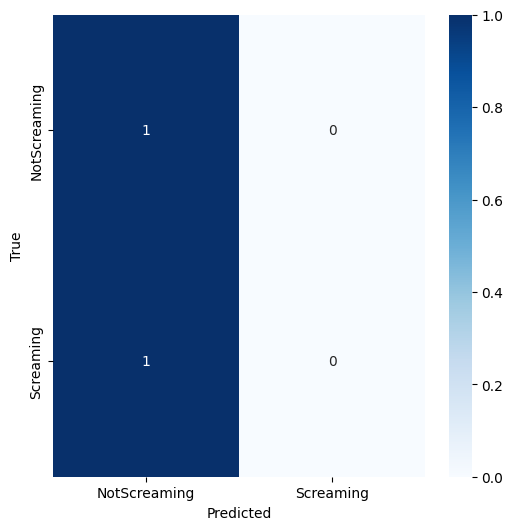


Confusion Matrix for model 2:


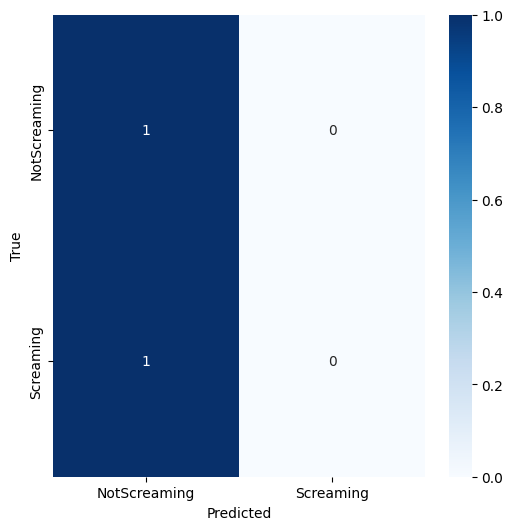

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

classes = val_dataset.classes

# Evaluar los modelos y plotear la matriz de confusión
accuracy_1, precision_1, recall_1, f1_1, y_true_1, y_pred_1 = evaluate_model(model_1, val_loader)
accuracy_2, precision_2, recall_2, f1_2, y_true_2, y_pred_2 = evaluate_model(model_2, val_loader)

print(f"Metrics for model 1:")
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

print(f"\nMetrics for model 2:")
print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

# Plot matrices de confusión
print("\nConfusion Matrix for model 1:")
plot_confusion_matrix(y_true_1, y_pred_1, classes)

print("\nConfusion Matrix for model 2:")
plot_confusion_matrix(y_true_2, y_pred_2, classes)
